In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('cidades_correto.csv')

## Mestrado

In [41]:
alunos_mes = pd.read_csv('A_Mes.csv', delimiter=';')
alunos_mes.head()

,ANO,NIVEL,COD_CURSO,NOME_CURSO,CIDADE,PAIS,NOME_PAIS,TOTAL,Unnamed: 8
0,1997,M,1,Matemática,Araguari,BR,Brasil,1,NaN
1,1997,M,1,Matemática,Barretos,BR,Brasil,1,NaN
2,1997,M,1,Matemática,Belo Horizonte,BR,Brasil,1,NaN
3,1997,M,1,Matemática,Campinas,BR,Brasil,2,NaN
4,1997,M,1,Matemática,Fernandópolis,BR,Brasil,1,NaN


In [42]:
alunos_mes = alunos_mes[alunos_mes.PAIS.isin(["BR"])]

alunos_mes.tail()

,ANO,NIVEL,COD_CURSO,NOME_CURSO,CIDADE,PAIS,NOME_PAIS,TOTAL,Unnamed: 8
59001,2017,M,94,Ciências Farmacêuticas,Campinas,BR,Brasil,1,NaN
59002,2017,M,94,Ciências Farmacêuticas,Jundiaí,BR,Brasil,1,NaN
59003,2017,M,94,Ciências Farmacêuticas,Maracaju,BR,Brasil,1,NaN
59004,2017,M,94,Ciências Farmacêuticas,Santo André,BR,Brasil,1,NaN
59005,2017,M,94,Ciências Farmacêuticas,São Paulo,BR,Brasil,1,NaN


In [43]:
data_mes = pd.DataFrame({'cidade': alunos_mes.CIDADE,
                 'numero': alunos_mes.TOTAL,
                 'curso': alunos_mes.COD_CURSO,
                 'nome_curso': alunos_mes.NOME_CURSO,
                 'ano': alunos_mes.ANO,
                 'UF': 'NA',
                 'lat': np.nan,
                 'lon': np.nan,
                 'dist': np.nan})
data_mes.head()

,UF,ano,cidade,curso,dist,lat,lon,nome_curso,numero
0,NA,1997,Araguari,1,NaN,NaN,NaN,Matemática,1
1,NA,1997,Barretos,1,NaN,NaN,NaN,Matemática,1
2,NA,1997,Belo Horizonte,1,NaN,NaN,NaN,Matemática,1
3,NA,1997,Campinas,1,NaN,NaN,NaN,Matemática,2
4,NA,1997,Fernandópolis,1,NaN,NaN,NaN,Matemática,1


In [44]:
for i, e in enumerate(df.cidade):
    c = data_mes[data_mes["cidade"] == e]
    for j, f in zip(c.index, c.cidade):
        data_mes.at[j, "UF"] = df.at[i, "UF"]
        data_mes.at[j, "dist"] = df.at[i, "dist"]
        data_mes.at[j, "lat"] = df.at[i, "lat"]
        data_mes.at[j, "lon"] = df.at[i, "lon"]

In [45]:
data_mes.head()

,UF,ano,cidade,curso,dist,lat,lon,nome_curso,numero
0,MG,1997,Araguari,1,487.967563,-0.325474,-0.841102,Matemática,1
1,SP,1997,Barretos,1,304.054526,-0.358813,-0.847661,Matemática,1
2,MG,1997,Belo Horizonte,1,462.854596,-0.347975,-0.766661,Matemática,1
3,SP,1997,Campinas,1,0.000000,-0.399809,-0.821355,Matemática,2
4,SP,1997,Fernandópolis,1,440.278335,-0.353994,-0.877006,Matemática,1


In [46]:
data_mes['dist'].replace('', np.nan, inplace=True)
data_mes.dropna(inplace=True)

In [47]:
data_mes.to_csv('mes.csv')

## Histograma distância

In [48]:
col = 12
threshold = 130

In [49]:
data_mes_plt = sum([[float(data_mes.at[i, "dist"])]*int(data_mes.at[i, "numero"]) for i in data_mes.index], [])

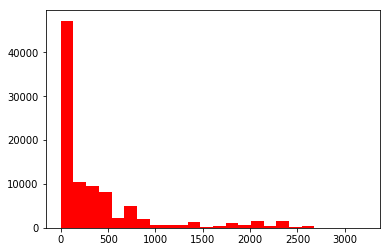

In [50]:
plt.hist(np.asarray(data_mes_plt), 2*col, color='red')
plt.show()

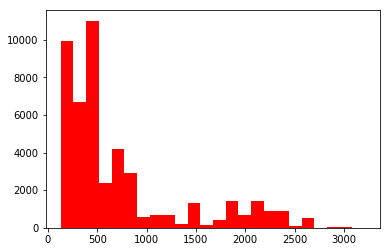

In [51]:
plt.hist(np.asarray([e for e in data_mes_plt if e > threshold]), 2*col, color='red')
plt.show()

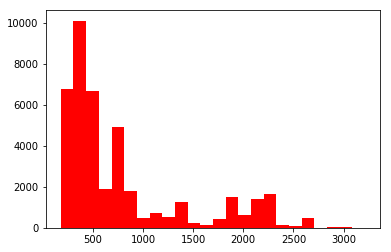

In [52]:
plt.hist(np.asarray([e for e in data_mes_plt if e > threshold+50]), 2*col, color='red')
plt.show()

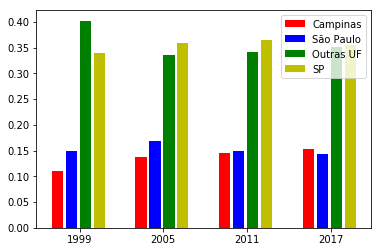

In [53]:
bar_width = 0.8


for i in [1999, 2005, 2011, 2017]:
    data_mes_ano = data_mes[data_mes["ano"] == i]
    tot = sum(int(e) for e in data_mes_ano.numero)
    sp = sum([int(e) for e in data_mes_ano[data_mes_ano["cidade"] == "São Paulo"].numero])
    camp = sum([int(e) for e in data_mes_ano[data_mes_ano["cidade"] == "Campinas"].numero])
    SP = sum([int(e) for e in data_mes_ano[data_mes_ano["UF"] == "SP"].numero],-camp -sp)
    SPn = sum([int(e) for e in data_mes_ano[data_mes_ano["UF"] != "SP"].numero])
    plt.bar(i, camp/tot, bar_width, color = 'r')
    plt.bar(i+1, sp/tot, bar_width, color = 'b')
    plt.bar(i+2, SPn/tot, bar_width, color='g')
    plt.bar(i+3, SP/tot, bar_width, color='y')
    plt.xticks([1999+1.6, 2005+1.6, 2011+1.6, 2017+1.6], ['1999', '2005', '2011', '2017'])

#    plt.xticks(str(i)+' sp + camp')
    

        

plt.legend(['Campinas', 'São Paulo', 'Outras UF', 'SP'],loc='best')